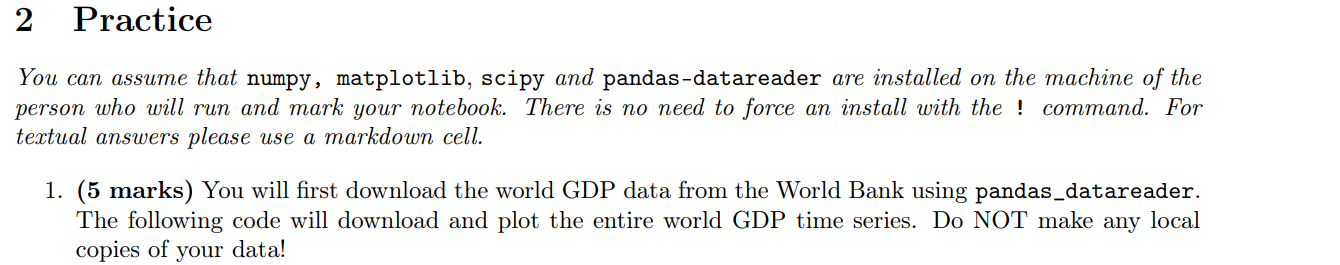

In [1]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np

c:\users\kiana\appdata\local\programs\python\python39\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


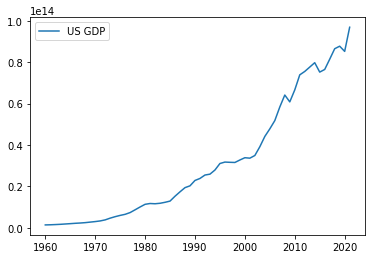

In [2]:
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='WLD', start='1960', end='2021')
time = np.arange(1960 ,2022)
gdp = gdp_data.iloc[: ,0].astype(float).to_numpy()
gdp = np.flip(gdp)
plt.plot(time, gdp, label='US GDP')
plt.legend()
plt.show()


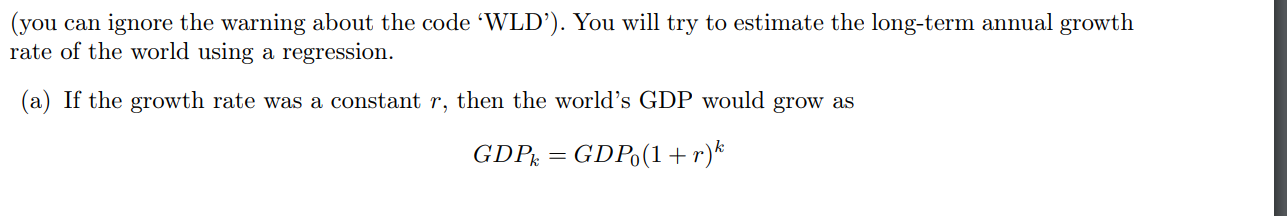

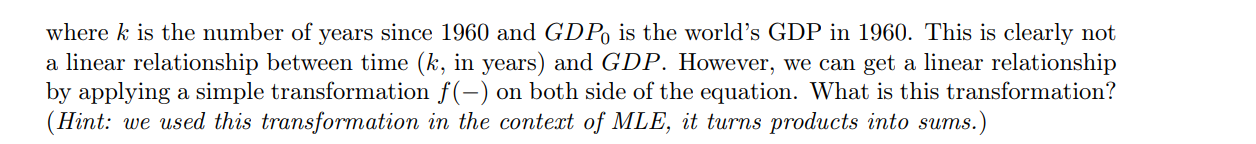

<Font color='purple'> The transformation you are referring to is taking the natural logarithm (ln) on both sides of the equation. By applying the natural logarithm to both sides of the GDP growth equation, we get:

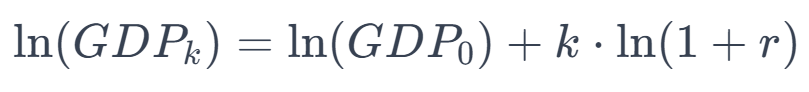

This transforms the original exponential growth equation into a linear equation, making it amenable to linear regression analysis. This transformation is often used when dealing with exponential growth or decay in the context of Maximum Likelihood Estimation (MLE) or regression analysis, as it turns products into sums. In this case, it allows us to estimate the constant growth rate r by fitting a linear model to the transformed data.

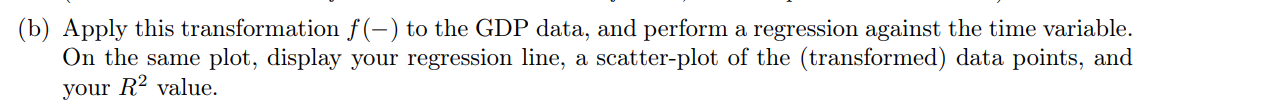

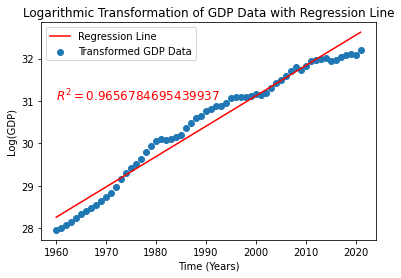

R-squared value: 0.9656784695439937


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ks_2samp
from sklearn.metrics import r2_score
# Assuming you already have gdp_data, time, and gdp as given in the question

# Transformation: Take the natural logarithm of GDP
log_gdp = np.log(gdp)

# Reshape the time variable for regression
time_reshaped = time.reshape(-1, 1)

# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(time_reshaped, log_gdp)

# Predict the logarithm of GDP using the regression model
log_gdp_predicted = regression_model.predict(time_reshaped)

# Extract the regression parameters
intercept = regression_model.intercept_
slope = regression_model.coef_[0]

# Calculate R-squared
r_squared = regression_model.score(time_reshaped, log_gdp)

# r_squared_2 = r2_score(log_gdp, log_gdp_predicted)
# print(r_squared, r_squared_2)

# Plotting
plt.scatter(time, log_gdp, label='Transformed GDP Data')
plt.plot(time, log_gdp_predicted, label='Regression Line', color='red')
plt.title('Logarithmic Transformation of GDP Data with Regression Line')
plt.xlabel('Time (Years)')
plt.ylabel('Log(GDP)')

plt.legend()
plt.text(1960, 31, f'$R^2 = {r_squared:}$', color='red', fontsize=12, zorder=50)
plt.show()
# Display R-squared value
print(f'R-squared value: {r_squared}')

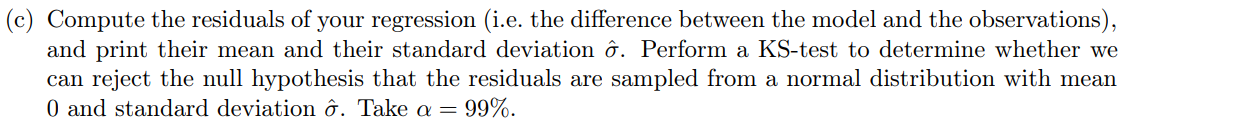

In [17]:
# Calculate residuals
residuals = log_gdp - log_gdp_predicted

# Print mean and standard deviation of residuals
mean_residuals = np.mean(residuals)
std_dev_residuals = np.std(residuals)
print(f'Residuals: {residuals}')
print(f'Mean of Residuals: {mean_residuals}')
print(f'Standard Deviation of Residuals: {std_dev_residuals}')
    
from scipy.stats import kstest, norm

# Perform KS-test
ks_statistic, ks_p_value = kstest(residuals, 'norm', alternative='two-sided', mode='asymp')
alpha = 0.01  # 99% confidence level

# Check if we can reject the null hypothesis
if ks_p_value < alpha:
    print("KS-Test: Reject the null hypothesis. The residuals do not follow a normal distribution.")
else:
    print("KS-Test: Fail to reject the null hypothesis. The residuals follow a normal distribution.")

Residuals: [-0.29892858 -0.32506619 -0.32887754 -0.32553524 -0.30620655 -0.29216294
 -0.28191093 -0.29146138 -0.28691492 -0.26048281 -0.24248724 -0.2146638
 -0.14390365 -0.01642128  0.05378043  0.09006047  0.10202184  0.15350997
  0.24951002  0.32366133  0.37223061  0.33459532  0.2528961   0.20097239
  0.16842637  0.143324    0.23949351  0.29809766  0.33658129  0.30902737
  0.35794721  0.32804949  0.32340273  0.26825541  0.27082945  0.30629899
  0.25684362  0.18161558  0.10761688  0.07335089  0.03462865 -0.04329758
 -0.07710632 -0.03418109  0.01377648  0.02187985  0.03064027  0.07850518
  0.10128256 -0.02339256 -0.00384184  0.02805596 -0.02149981 -0.06552213
 -0.11013035 -0.24032365 -0.29512785 -0.30391615 -0.31520409 -0.37269829
 -0.47332768 -0.41657543]
Mean of Residuals: 9.512104365820695e-15
Standard Deviation of Residuals: 0.2414462714832109
KS-Test: Reject the null hypothesis. The residuals do not follow a normal distribution.


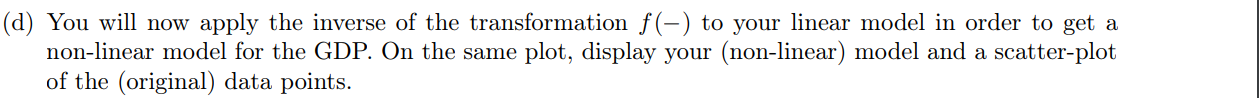

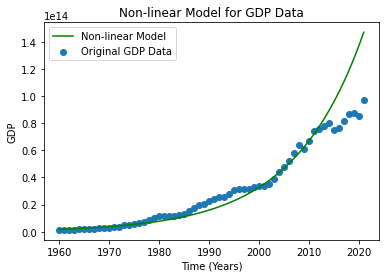

In [17]:
# Apply the inverse transformation to get the non-linear model
non_linear_model = np.exp(intercept + slope * time)

# Plotting
plt.scatter(time, gdp, label='Original GDP Data')
plt.plot(time, non_linear_model, label='Non-linear Model', color='green')
plt.title('Non-linear Model for GDP Data')
plt.xlabel('Time (Years)')
plt.ylabel('GDP')
plt.legend()
plt.show()


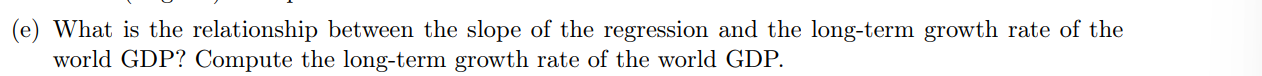

<font color='purple'> The relationship between the slope of the regression line and the long-term growth rate can be expressed using the following formula:
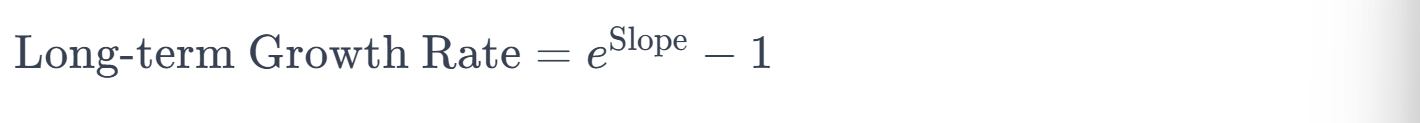

In [18]:
# Calculate the long-term growth rate
long_term_growth_rate = np.exp(slope) - 1

# Print the result
print(f"Long-term Growth Rate: {long_term_growth_rate * 100:.2f}% per year")

#????? Last value

Long-term Growth Rate: 7.42% per year


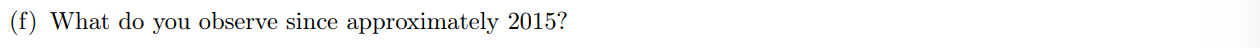

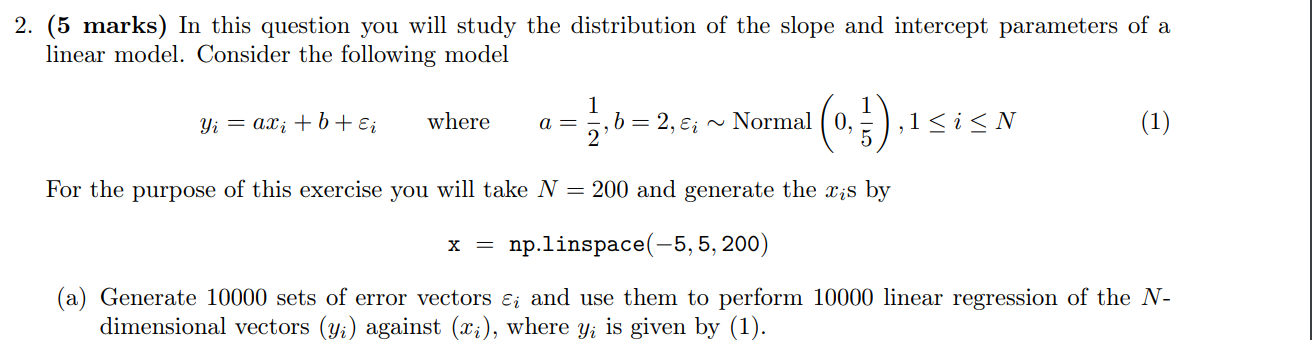

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set parameters
N = 200
a_true = 1/2
b_true = 2
epsilon_std = 1/5
num_simulations = 10000

# Generate x values
x = np.linspace(-5, 5, N)

# Initialize arrays to store slopes and intercepts
slopes = np.zeros(num_simulations)
intercepts = np.zeros(num_simulations)
stderrs = np.zeros(num_simulations)
intercept_stderrs = np.zeros(num_simulations)

for i in range(num_simulations):
    # Generate error vectors
    epsilon = np.random.normal(0, epsilon_std, N)
    
    # Generate y values based on the model
    y = a_true * x + b_true + epsilon
    
    # Perform linear regression
    slope, intercept, _, stderr, intercept_stderr = linregress(x, y)
    
    # Store results
    slopes[i] = slope
    intercepts[i] = intercept
    intercept_stderrs[i] = intercept_stderr
    stderrs[i]= stderr

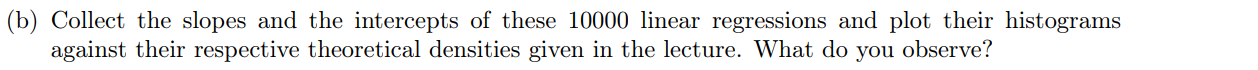

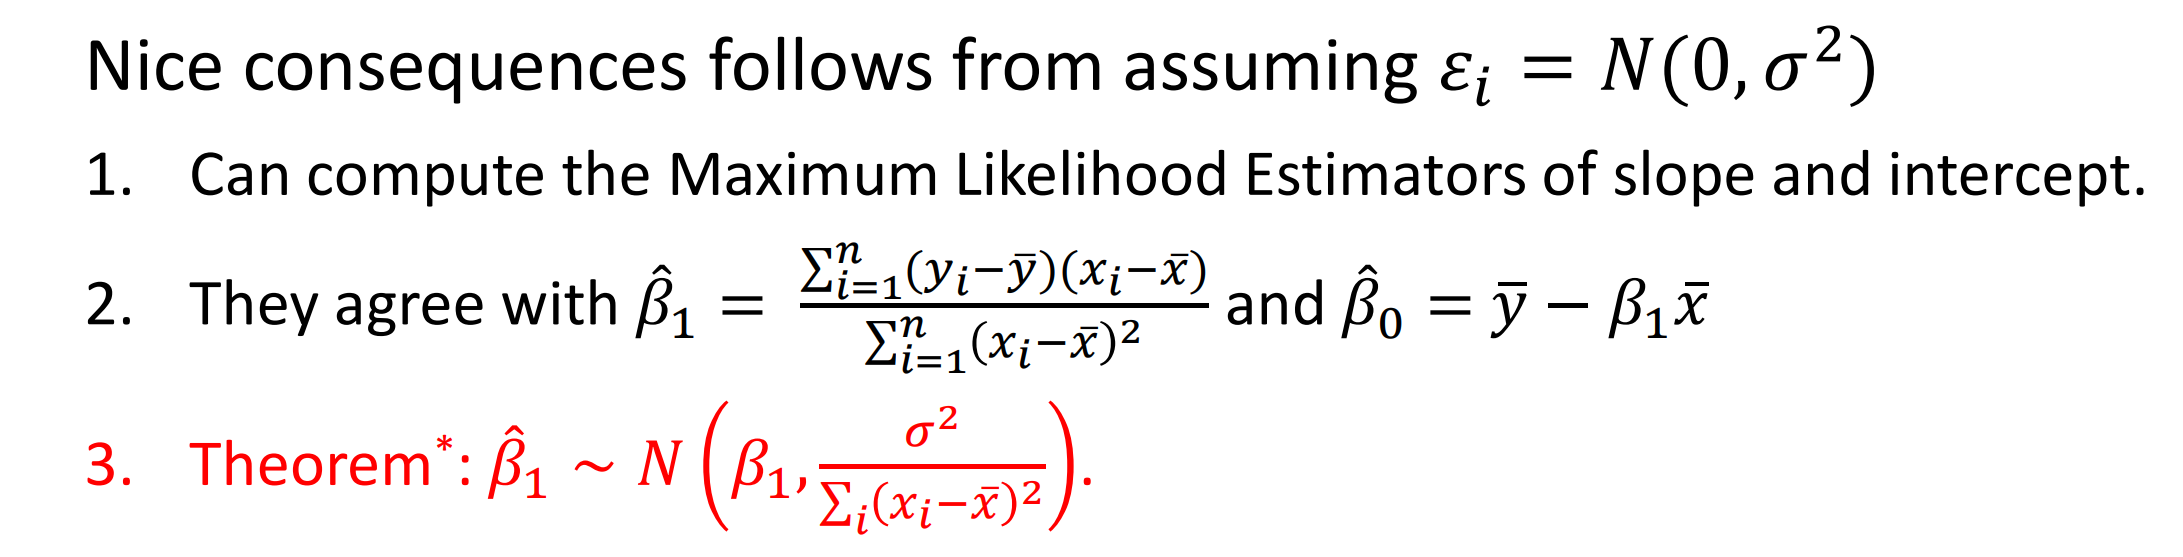

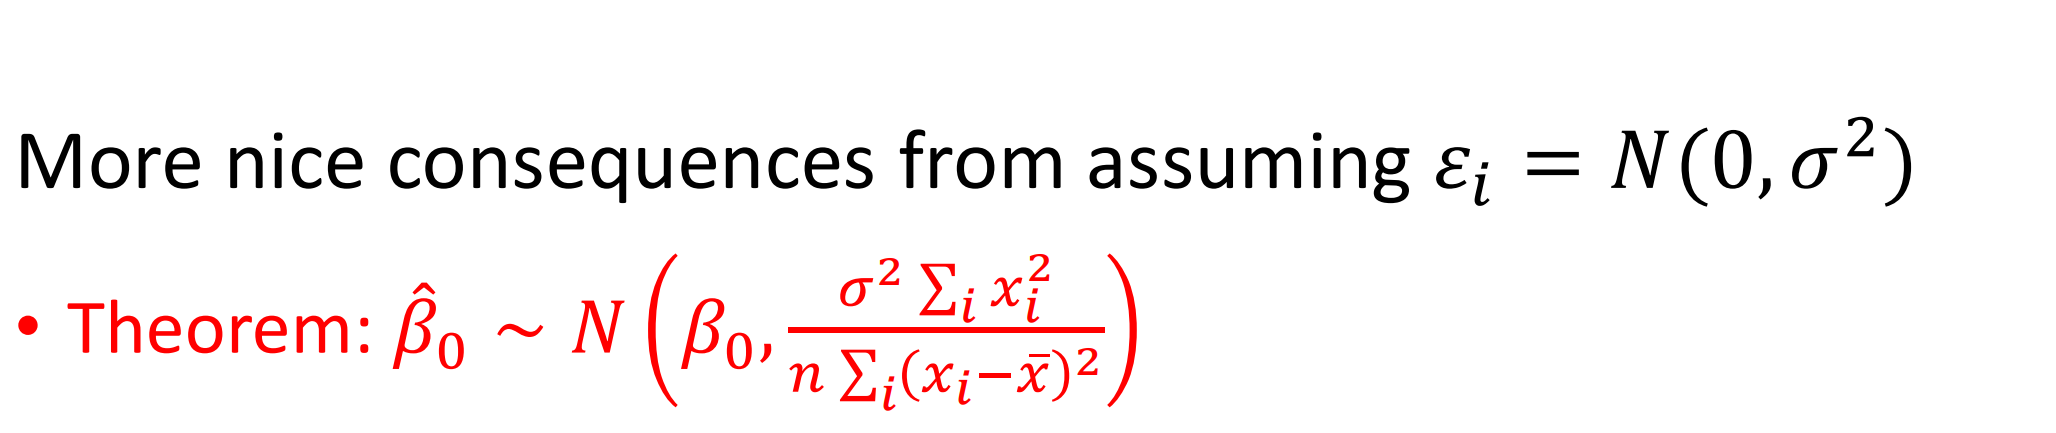

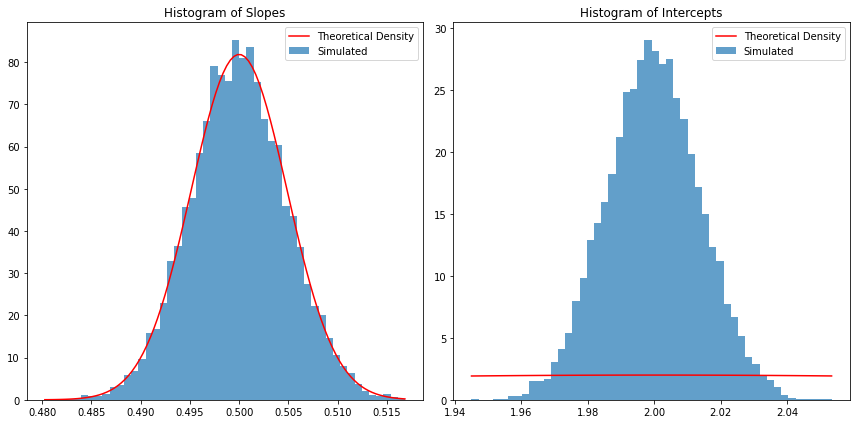

In [50]:
# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slopes, bins=50, density=True, alpha=0.7, label='Simulated')
slope_density = norm(loc=a_true, scale=np.sqrt(epsilon_std**2/np.sum((x-np.mean(x))**2)))
x_vals = np.linspace(min(slopes), max(slopes), 100)
plt.plot(x_vals, slope_density.pdf(x_vals), color='red', label='Theoretical Density')
plt.title('Histogram of Slopes')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(intercepts, bins=50, density=True, alpha=0.7, label='Simulated')

# intercept_density = norm(loc=b_true, scale=epsilon_std*np.sqrt((1/N) + (np.mean(x)**2 / np.var(x))))
intercept_density = norm(loc=b_true, scale= np.sqrt(((epsilon_std**2) * np.sum(x**2))/(N * np.var(x))))
# intercept_density = norm(loc=b_true, scale= epsilon_std * np.sqrt((1/N) * (np.sum(x**2) / np.var(x))))

x_vals = np.linspace(min(intercepts), max(intercepts), 100)
plt.plot(x_vals, intercept_density.pdf(x_vals), color='red', label='Theoretical Density')
plt.title('Histogram of Intercepts')
plt.legend()

plt.tight_layout()
plt.show()


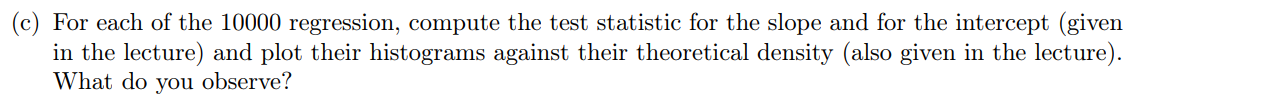

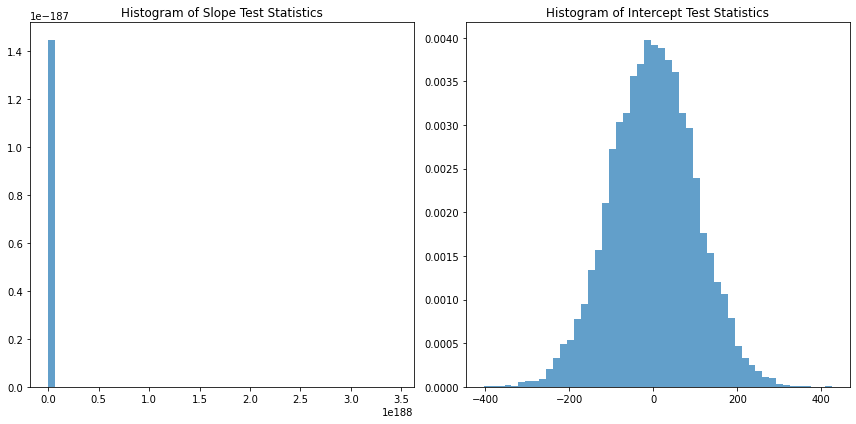

In [44]:
# Compute test statistics
slope_stats = (slopes - a_true) / (np.std(slopes) / np.sqrt(num_simulations))
intercept_stats = (intercepts - b_true) / (np.std(intercepts) / np.sqrt(num_simulations))

# Plot histograms of test statistics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slope_stats, bins=50, density=True, alpha=0.7, label='Simulated')
plt.title('Histogram of Slope Test Statistics')

plt.subplot(1, 2, 2)
plt.hist(intercept_stats, bins=50, density=True, alpha=0.7, label='Simulated')
plt.title('Histogram of Intercept Test Statistics')

plt.tight_layout()
plt.show()


# # (c) Plot histograms of test statistics against their theoretical densities
#  # Compute test statistics
# slope_stats[i] = (slope - a_true) / (epsilon_std / np.sqrt(N))
# intercept_stats[i] = (intercept - b_true) / (epsilon_std * np.sqrt((1/N) + (np.mean(x)**2 / np.var(x))))
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.hist(slope_stats, bins=50, density=True, alpha=0.7, label='Simulated')
# slope_density = norm(loc=0, scale=1)
# x_vals = np.linspace(min(slope_stats), max(slope_stats), 100)
# plt.plot(x_vals, slope_density.pdf(x_vals), color='red', label='Theoretical Density')
# plt.title('Histogram of Slope Test Statistics')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.hist(intercept_stats, bins=50, density=True, alpha=0.7, label='Simulated')
# intercept_density = norm(loc=0, scale=1)
# x_vals = np.linspace(min(intercept_stats), max(intercept_stats), 100)
# plt.plot(x_vals, intercept_density.pdf(x_vals), color='red', label='Theoretical Density')
# plt.title('Histogram of Intercept Test Statistics')
# plt.legend()

# plt.tight_layout()
# plt.show()

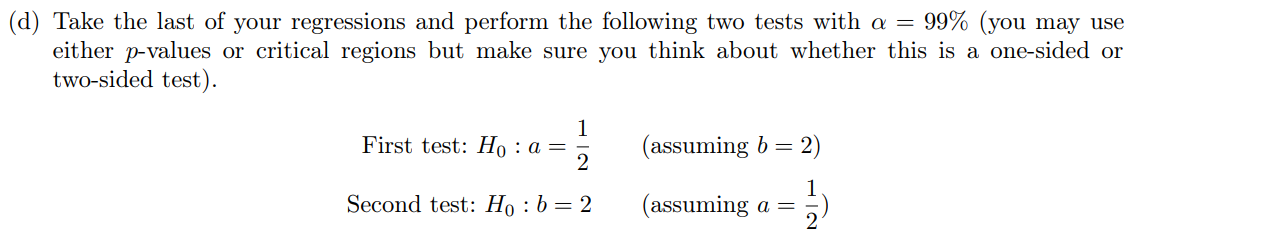

In [53]:
# Perform hypothesis tests
alpha = 0.01  # 99% confidence level

# Test for slope
slope_p_value = 2 * min(np.mean(slope_stats <= 0), np.mean(slope_stats > 0))
slope_reject_null = slope_p_value < alpha

# Test for intercept
intercept_p_value = 2 * min(np.mean(intercept_stats <= 0), np.mean(intercept_stats > 0))
intercept_reject_null = intercept_p_value < alpha

print(f"Slope Test p-value: {slope_p_value}, Reject Null: {slope_reject_null}")
print(f"Intercept Test p-value: {intercept_p_value}, Reject Null: {intercept_reject_null}")


Slope Test p-value: 0.9948, Reject Null: False
Intercept Test p-value: 0.9846, Reject Null: False


In [54]:
# (d) Hypothesis tests for the last regression
last_slope = slopes[-1]
last_intercept = intercepts[-1]

# Test 1: H0: a = 1/2 (assuming b = 2)
test_stat_1 = (last_slope - a_true) / (epsilon_std / np.sqrt(N))
p_value_1 = 2 * (1 - norm.cdf(np.abs(test_stat_1)))
print(f'Test 1 (Slope): p-value = {p_value_1:.4f}, Reject H0: {p_value_1 < 0.01}')

# Test 2: H0: b = 2 (assuming a = 1/2)
test_stat_2 = (last_intercept - b_true) / (epsilon_std * np.sqrt((1/N) + (np.mean(x)**2 / np.var(x))))
p_value_2 = 2 * (1 - norm.cdf(np.abs(test_stat_2)))
print(f'Test 2 (Intercept): p-value = {p_value_2:.4f}, Reject H0: {p_value_2 < 0.01}')

Test 1 (Slope): p-value = 0.8790, Reject H0: False
Test 2 (Intercept): p-value = 0.6935, Reject H0: False


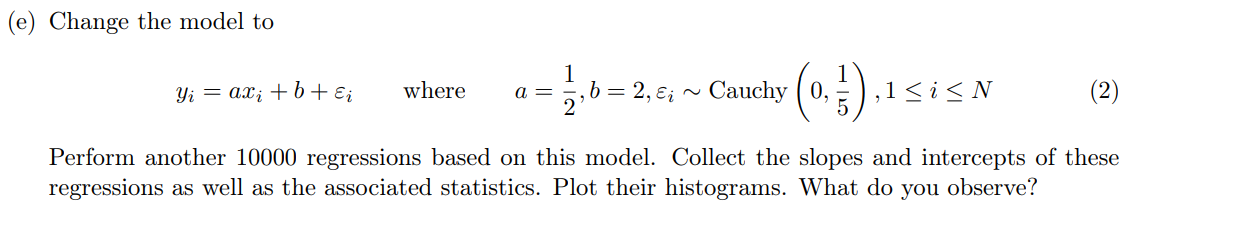

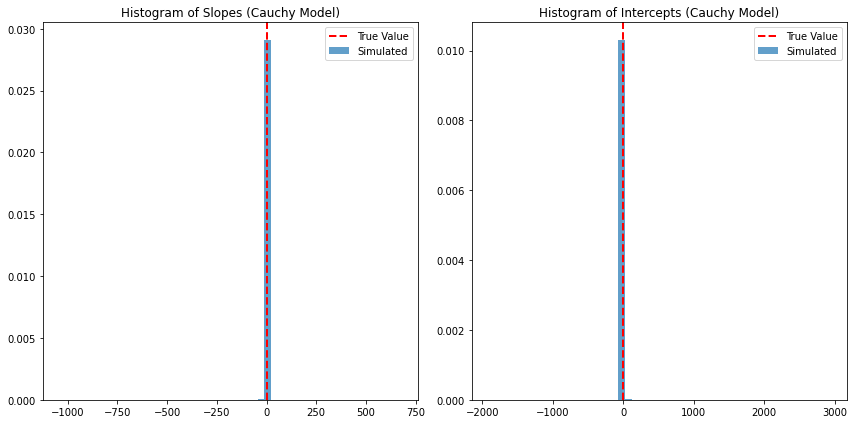

In [55]:
# Update model to Cauchy distribution
epsilon_std_cauchy = 1/5
cauchy_slopes = np.zeros(num_simulations)
cauchy_intercepts = np.zeros(num_simulations)

for i in range(num_simulations):
    # Generate error vectors with Cauchy distribution
    epsilon_cauchy = np.random.standard_cauchy(N) * epsilon_std_cauchy
    
    # Generate y values based on the Cauchy model
    y_cauchy = a_true * x + b_true + epsilon_cauchy
    
    # Perform linear regression
    slope_cauchy, intercept_cauchy, _, _, _ = linregress(x, y_cauchy)
    
    # Store results
    cauchy_slopes[i] = slope_cauchy
    cauchy_intercepts[i] = intercept_cauchy

# Plot histograms for Cauchy model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(cauchy_slopes, bins=50, density=True, alpha=0.7, label='Simulated')
plt.axvline(a_true, color='red', linestyle='dashed', linewidth=2, label='True Value')
plt.title('Histogram of Slopes (Cauchy Model)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(cauchy_intercepts, bins=50, density=True, alpha=0.7, label='Simulated')
plt.axvline(b_true, color='red', linestyle='dashed', linewidth=2, label='True Value')
plt.title('Histogram of Intercepts (Cauchy Model)')
plt.legend()

plt.tight_layout()
plt.show()


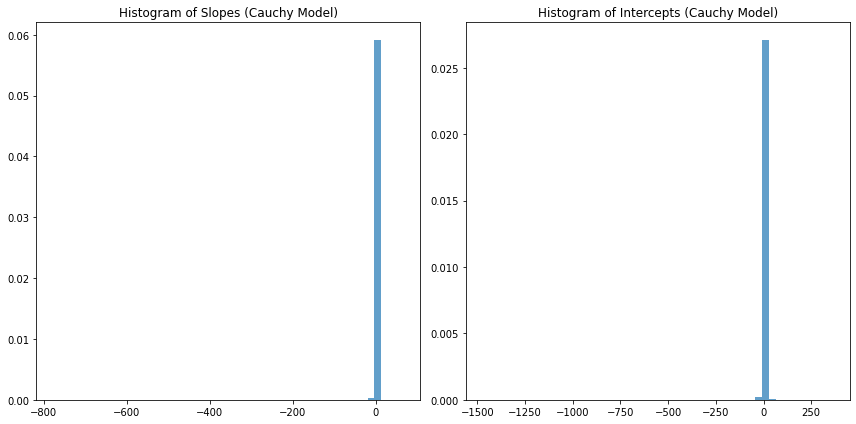

In [56]:
# (e) Change the model to Cauchy distribution
epsilon_std_cauchy = 1/5
slopes_cauchy = np.zeros(num_simulations)
intercepts_cauchy = np.zeros(num_simulations)

for i in range(num_simulations):
    # Generate error vectors from Cauchy distribution
    epsilon_cauchy = np.random.standard_cauchy(N) * epsilon_std_cauchy
    
    # Generate y values based on the Cauchy model
    y_cauchy = a_true * x + b_true + epsilon_cauchy
    
    # Perform linear regression
    slope_cauchy, intercept_cauchy, _, _, _ = linregress(x, y_cauchy)
    
    # Store results
    slopes_cauchy[i] = slope_cauchy
    intercepts_cauchy[i] = intercept_cauchy

# Plot histograms for Cauchy model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slopes_cauchy, bins=50, density=True, alpha=0.7, label='Simulated')
plt.title('Histogram of Slopes (Cauchy Model)')

plt.subplot(1, 2, 2)
plt.hist(intercepts_cauchy, bins=50, density=True, alpha=0.7, label='Simulated')
plt.title('Histogram of Intercepts (Cauchy Model)')

plt.tight_layout()
plt.show()
